> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# VI: Perceptron

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

<h2><span style="color:blue">[Insert your ID HERE] [Insert your name HERE]</span> </h2>

In [1]:
%load_ext autoreload
%autoreload 2

import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2020-03-17 03:18:42.143477


## Problem description

In this problem, we will implemnt an online perceptron algorithm using a MNIST dataset. The MNIST dataset contains handwritten digits that is commonly used for testing various machine learning algorithms. We use a subset of the dataset only. The training data ($\texttt{perceptron_training_data.csv}$) contains two handwritten digits, either 3 or 5, labeled as 1 or -1, respectively. We can visualize each sample using the $\texttt{imshow}$ function after reshaping $794$-dimensional vector to a $28 \times 28$ matrix.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    X = df.iloc[:, 1:].values
    y = df.iloc[:, :1].values.reshape(-1)
    features = df.iloc[:, 1:].columns.values

    return (X, y, features)

In [4]:
X_train, y_train, _ = load_data('perceptron_training_data.csv')
X_test, y_test, _ = load_data('perceptron_test_data.csv')

In [5]:
X_train.shape[1]

784

In [6]:
X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)

X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}

In [7]:
X_train.shape, y_train.shape

((1000, 785), (1000,))

### P 1.1

(*10 points*) Visualize training samples. Use first 30 samples in training data. You should not include bias term.

In [8]:
from P06 import plot_training_samples

<Figure size 7200x2880 with 0 Axes>

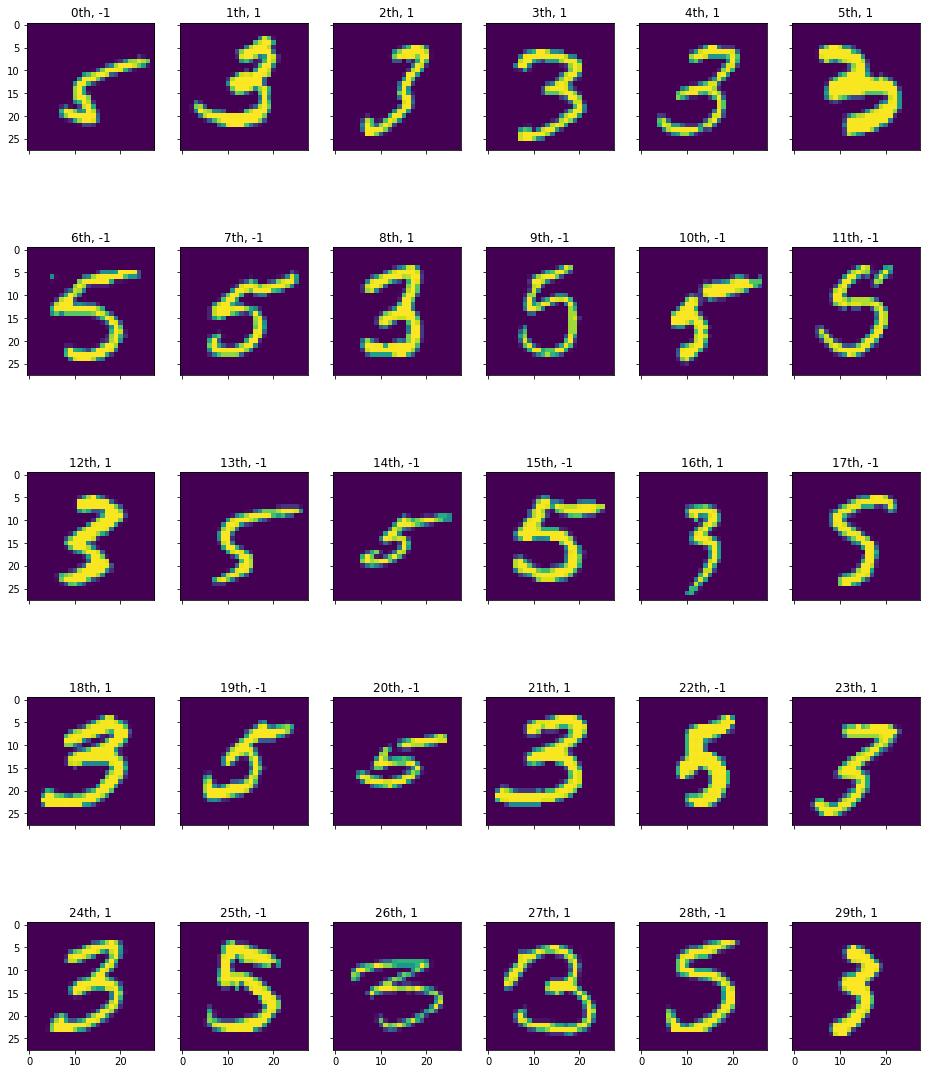

In [9]:
fig = plot_training_samples(X_train, y_train)

### P 1.2

(*50 points*) Implement an online perceptron algorithm.   
  > Initialize weights and the bias to 0.    
  > Number of epoch: 100    
  > An epoch is one complete presentation of the data set to be learned to a learning machine. For example, the total number of iterations is 500 for 5 epochs when the training dataset consists of 100 samples.

In [10]:
from P06 import perceptron

In [11]:
w = np.zeros(X['train'].shape[1])
epoch = 100
w, number_of_misclassifications, test_accuracy = perceptron(X, y, w, epoch)

- predict some labels in test data

In [12]:
print(number_of_misclassifications[-20:])
print(test_accuracy[-20:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937, 0.937]


In [13]:
def sgn(x):
    return (x >= 0)*2-1

In [14]:
print(sgn(X['test'][6].dot(w)))
print(sgn(X['test'][66].dot(w)))
print(sgn(X['test'][666].dot(w)))
print(sgn(X['test'][4].dot(w)))
print(sgn(X['test'][44].dot(w)))
print(sgn(X['test'][444].dot(w)))

1
-1
1
-1
-1
-1


<Figure size 7200x2880 with 0 Axes>

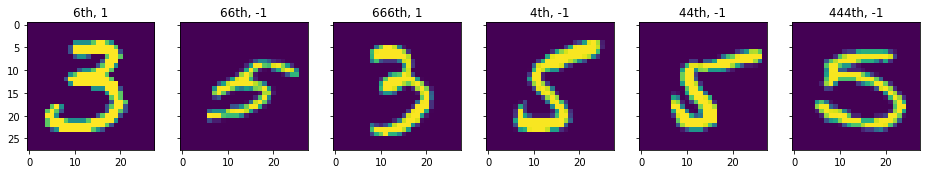

In [15]:
fig = plt.figure(figsize=(100, 40))
f, axes = plt.subplots(1,6, sharex = True, sharey = True)
f.set_size_inches((16, 20))
index_lst = [6, 66, 666, 4, 44, 444]
for j in range(6):
    axes[j].imshow(X_test[index_lst[j]][:784].reshape(28, 28))
    axes[j].set_title(f'{index_lst[j]}th, {y_test[index_lst[j]]}')

### P 1.3

(*10 points*) Plot the number of missclassifications over epochs on the training set. Results are not given for this assignment.

In [16]:
from P06 import plot_number_of_misclassifications_over_epochs

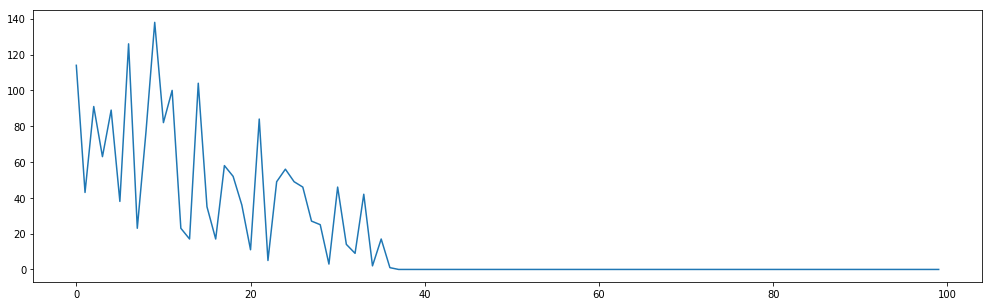

In [17]:
fig = plot_number_of_misclassifications_over_epochs(number_of_misclassifications)

### P 1.4

(*10 points*) Plot the accuracy over epochs on the test set. Results are not given for this assignment.

In [18]:
from P06 import plot_accuracy_over_epochs

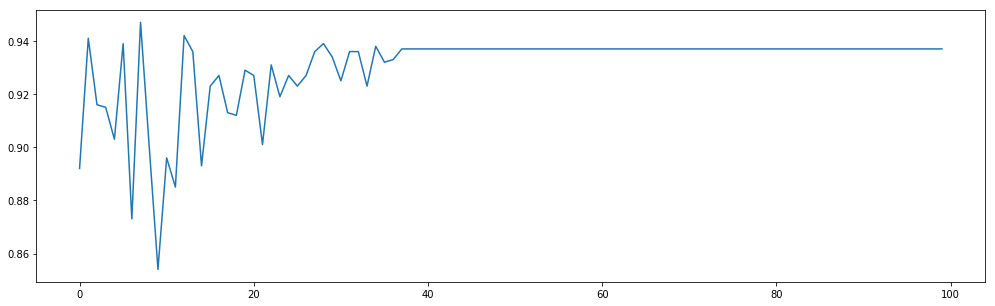

In [19]:
fig = plot_accuracy_over_epochs(test_accuracy)

## Result Analysis and Discussion (20 points)    
For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.

Your answer must include the analysis about:

- Online learning
- Perceptron Algorithm

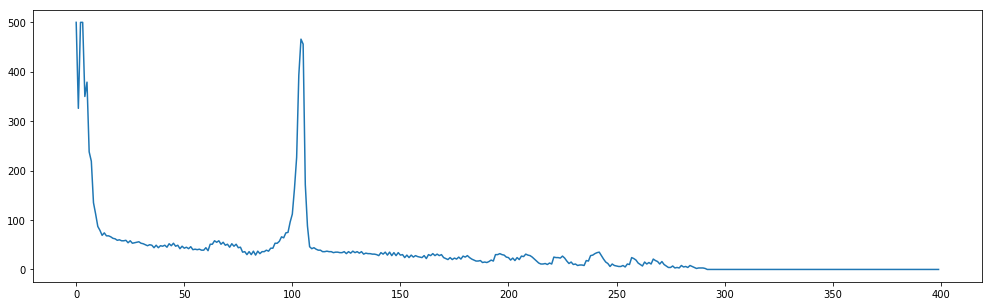

In [23]:
from P06 import perceptron_wholedata
w = np.zeros(X['train'].shape[1])
epoch = 400
w, number_of_misclassifications, test_accuracy = perceptron_wholedata(X, y, w, epoch)
fig = plot_number_of_misclassifications_over_epochs(number_of_misclassifications)

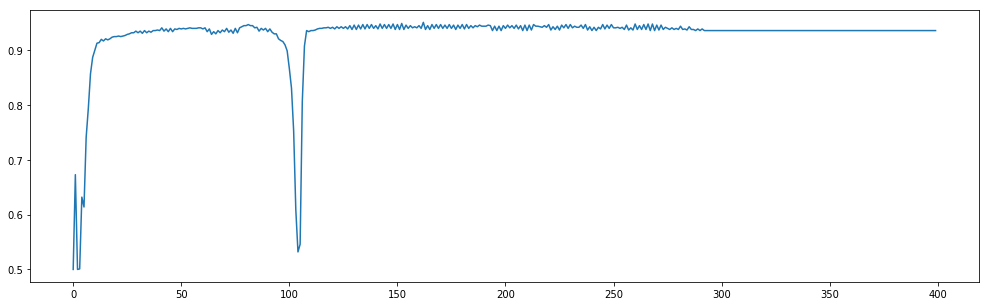

In [24]:
fig = plot_accuracy_over_epochs(test_accuracy)

In [25]:
print(number_of_misclassifications[-20:])
print(test_accuracy[-20:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936, 0.936]


Normal regression model spikes up around 100th epoch. This may happen because the model is passing through local minimum. Whereas Stochastic regression shows jagged progress over the iterations, but it results in much faster optimum without falling into the local minimum. This is because each update makes bigger jumps towards each direction, leading for a much eratic behavior of the model.